In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df_preprocessed = pd.read_csv('admits_patients_diag_icu_PROCESSED.csv')
df_preprocessed.head()

C:\Users\nicod\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,7,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,subject_id,hadm_id,admittime,deathtime,admission_type,insurance,ethnicity,los,died_at_the_hospital,...,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,Neuro Intermediate,Neuro Surgical Intensive Care Unit (Neuro SICU),Other-ICU
0,0,14679932.0,21038362,2139-09-26 14:16:00,NaN,ELECTIVE,Other,OTHER/UNKNOWN,1.884722,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,15585972.0,24941086,2123-10-07 23:56:00,NaN,ELECTIVE,Other,WHITE,4.476389,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,15078341.0,23272159,2122-08-28 08:48:00,NaN,ELECTIVE,Other,BLACK/AFRICAN AMERICAN,2.155556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,17301855.0,29732723,2140-06-06 14:23:00,NaN,ELECTIVE,Other,WHITE,2.001389,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,17991012.0,24298836,2181-07-10 20:28:00,NaN,ELECTIVE,Other,WHITE,1.806250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362995 entries, 0 to 362994
Data columns (total 33 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Unnamed: 0                                       362995 non-null  int64  
 1   subject_id                                       335257 non-null  float64
 2   hadm_id                                          362995 non-null  int64  
 3   admittime                                        335257 non-null  object 
 4   deathtime                                        5605 non-null    object 
 5   admission_type                                   335257 non-null  object 
 6   insurance                                        335257 non-null  object 
 7   ethnicity                                        335257 non-null  object 
 8   los                                              335257 non-null  float64
 9   died_at_the_hos

In [31]:
# Remove LOS with negative number, likely entry error or died before the stay in hospital
df_preprocessed = df_preprocessed[df_preprocessed['los'] > 0]
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335257 entries, 0 to 335256
Data columns (total 33 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Unnamed: 0                                       335257 non-null  int64  
 1   subject_id                                       335257 non-null  float64
 2   hadm_id                                          335257 non-null  int64  
 3   admittime                                        335257 non-null  object 
 4   deathtime                                        5605 non-null    object 
 5   admission_type                                   335257 non-null  object 
 6   insurance                                        335257 non-null  object 
 7   ethnicity                                        335257 non-null  object 
 8   los                                              335257 non-null  float64
 9   died_at_the_hos

In [32]:
# Drop unused columns
df_preprocessed.drop(columns=['Unnamed: 0', 'subject_id', 'hadm_id', 'admittime', 'deathtime',
                'los', 'dod'], inplace=True)

df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335257 entries, 0 to 335256
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   admission_type                                   335257 non-null  object 
 1   insurance                                        335257 non-null  object 
 2   ethnicity                                        335257 non-null  object 
 3   died_at_the_hospital                             335257 non-null  float64
 4   gender                                           335257 non-null  float64
 5   anchor_age                                       335257 non-null  object 
 6   blood                                            335257 non-null  float64
 7   circulatory                                      335257 non-null  float64
 8   congenital                                       335257 non-null  float64
 9   digestive      

In [33]:
df_preprocessed.died_at_the_hospital.value_counts()

0.0    329652
1.0      5605
Name: died_at_the_hospital, dtype: int64

In [34]:
print('Number of positive samples:', (df_preprocessed.died_at_the_hospital == 1).sum()) # died at hospital
print('Number of negative samples:',  (df_preprocessed.died_at_the_hospital == 0).sum()) # not died at hospital
print('Total samples:', len(df_preprocessed))

Number of positive samples: 5605
Number of negative samples: 329652
Total samples: 335257


## Data Cleaning

In [35]:
# Create dummy columns for categorical variables
prefix_cols = ['ADM', 'INS', 'ETH', 'AGE']
dummy_cols = ['admission_type', 'insurance','ethnicity', 'anchor_age']
df_cleaned = pd.get_dummies(df_preprocessed, prefix=prefix_cols, columns=dummy_cols)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335257 entries, 0 to 335256
Data columns (total 38 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   died_at_the_hospital                             335257 non-null  float64
 1   gender                                           335257 non-null  float64
 2   blood                                            335257 non-null  float64
 3   circulatory                                      335257 non-null  float64
 4   congenital                                       335257 non-null  float64
 5   digestive                                        335257 non-null  float64
 6   endocrine                                        335257 non-null  float64
 7   genitourinary                                    335257 non-null  float64
 8   infectious                                       335257 non-null  float64
 9   injury         

In [65]:
df_cleaned = df_cleaned.astype(int)

In [66]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335257 entries, 0 to 335256
Data columns (total 38 columns):
 #   Column                                           Non-Null Count   Dtype
---  ------                                           --------------   -----
 0   died_at_the_hospital                             335257 non-null  int32
 1   gender                                           335257 non-null  int32
 2   blood                                            335257 non-null  int32
 3   circulatory                                      335257 non-null  int32
 4   congenital                                       335257 non-null  int32
 5   digestive                                        335257 non-null  int32
 6   endocrine                                        335257 non-null  int32
 7   genitourinary                                    335257 non-null  int32
 8   infectious                                       335257 non-null  int32
 9   injury                               

In [67]:
# Check for any remaining NaNs
df_cleaned.isnull().values.sum()

0

## Create training and test dataframes
When we build a predictive model, we want the model to work well on data that the model has never seen. To test for this we take our data and split it into three datasets: training, validation and test.

- **training set**: used to train the model
- **validation set**: data the model didn't see, but are used to optimize or tune parameters of the model
- **test set**: data the model and tuning process never saw (true test of generalizability)


In [94]:
# Target Variable (died_at_the_hospital)
HOSP_MORT = df_cleaned['died_at_the_hospital'].values
# Prediction Features
features = df_cleaned.drop(columns=['died_at_the_hospital'])

In [95]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 70:15:15 for train:valid:test dataset

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(features, HOSP_MORT, train_size=0.7)

In [96]:
# Now since we want the valid and test size to be equal (15% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [97]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(268205, 37)
(268205,)
(33526, 37)
(33526,)
(33526, 37)
(33526,)


(None, None)

In [75]:
# If we want to calculate probability of re-admission
model = clf
y_train_preds = model.predict_proba(X_train)[:,1]
y_valid_preds = model.predict_proba(X_valid)[:,1]

In [76]:
print(y_train[:10])
print(y_train_preds[:10])

[0 0 0 0 0 0 0 0 0 0]
[0.00806363 0.0136367  0.00823423 0.02303205 0.00522055 0.04110581
 0.0813607  0.00696373 0.04725304 0.00651547]


In [99]:
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
# Regression models used from scikit-learn for comparison OR
models = [GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_valid_preds = reg_model.predict(X_valid)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_valid, y_valid_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.


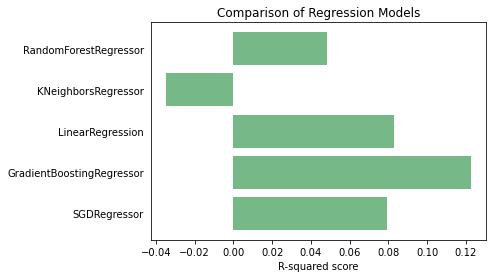

In [102]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('images/compare_models.png', bbox_inches = 'tight')

In [ ]:
The GradientBoostingRegressor has the best R2 score of ~13% so we focus on refining this particular model.

In [ ]:
# GradientBoostingRegressor will be used as the In-Hospit6al mortality prediction model
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_valid_preds = reg_model.predict(X_valid)
r2_not_refined = r2_score(y_valid, y_valid_preds)
print("R2 score is: {:2f}".format(r2_not_refined))

## 7. Parameter Tuning

To refine the GradientBoostingRegressor model, GridSearchCV function from scikit-learnis used to test out various permutations of parameters such as n_estimators, max_depth, and loss.

What is GridSearchCV and in general how it works? TO DO

## Calculate Performance Metrics


In [103]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

So why are precision and recall even needed? They’re mostly useful in situations where the true class labels are highly skewed. For example, in our case we have training data with most of the entries that belong to 0 class (not-dead-at-the hospital) which is a good thing, but for what concerns the performance metric we can get 95% accuracy by just predicting class 0 for every entry.

With skewed data, if you just guess one class or the other, you can get excellent accuracy but either precision or recall will be very poor.

It’s standard practice to set a threshold value of 0.5 and then a result value that’s less than 0.5 is a prediction of class 0, and a result value that’s greater than 0.5 is a prediction of class 1.

We can adjust the accuracy of a binary classification model by adjusting the value of the threshold. For example, in our case if we set the threshold to something like 0.9 then most result values will be less than 0.9 and so most predictions will be class 0 and we’ll get good accuracy. But again, either precision or recall will be poor.

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.9

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


ValueError: Found input variables with inconsistent numbers of samples: [268205, 7882]

In [ ]:
Finally, if we run the data through the classifier, and set the threshold to 0.0, 0.10, 0.20, . . , 0.90, 1.0 then each value of the threshold will genrate a different number of TP, FP, TN, FN. For each of the 11 threshold values, if we make a graph with FP on the x-axis and TP on the y-axis, we’ll get 11 dots. If we connect the dots we get what’s called a ROC curve (receiver operating characteristic).

In [ ]:
plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()